In [228]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas
from sklearn.cross_validation import train_test_split
import numpy
import seaborn as sns
import string
import nltk # for text manipulation
import warnings 


### As usual the first thing I generally do is try to import libraries and tools that will be used for the following project, things that I know I'm especially going to use such as pandas to read in the dataset. 

In [229]:
data = pandas.read_csv("Data Science Challenge.csv")
data.head()

,post_id,text,date_posted,questionable_content
0,0001c77a4801bb027d688e666563871f,RT @knowledgwharton: What's behind Apple's rec...,2012-04-18 19:36:01,0
1,000331a02f8139ed402aef6aa36e8082,"she escaped an abusive marriage, worked&payed ...",2016-07-18 06:20:01,0
2,0009cafe3525d848a2e559b1accb1146,Nigga this is outside,2017-06-01 21:06:58,1
3,00124caf4bb38d55fbdd48ded2411eda,GM takes on Ford Fiesta with the Chevy Sonic v...,2011-05-31 12:33:49,0
4,00133102dbc83e0ceb396abb7cd98886,"I want to give Tyrone a hug, a drink, and even...",2017-04-05 06:13:19,0


### The first step for me always and in general is to read in the dataset. In this case utlizing pandas to read the Data Science Challenge in. I used data.head() to just get a glimpse of the first 5 rows of the data from dataset. 

In [230]:
positive = data[data['questionable_content'] == 0]
positive

,post_id,text,date_posted,questionable_content
0,0001c77a4801bb027d688e666563871f,RT @knowledgwharton: What's behind Apple's rec...,2012-04-18 19:36:01,0
1,000331a02f8139ed402aef6aa36e8082,"she escaped an abusive marriage, worked&payed ...",2016-07-18 06:20:01,0
3,00124caf4bb38d55fbdd48ded2411eda,GM takes on Ford Fiesta with the Chevy Sonic v...,2011-05-31 12:33:49,0
4,00133102dbc83e0ceb396abb7cd98886,"I want to give Tyrone a hug, a drink, and even...",2017-04-05 06:13:19,0
5,0013c6e8f2775401af617972aed61371,My wife is gna have a portrait of me tattooed ...,2013-11-20 20:30:36,0
6,00146b87b80e4a4ce64e17ec1dc88519,@postessive @mjg59 @flexlibris have YOU ever g...,2018-02-28 17:10:52,0
7,00157c3551d5e73dc6acaad4be49d067,WOW WHAT AN HONOR!!,2015-09-17 01:18:22,0
8,001f068e1e2d9e1980d7b3f49fe9f6ee,"I'm at Vino Levantino in New York, NY",2016-04-10 01:52:29,0
9,002006d60aa1cfcbcefe91168fb4f9f2,"Dear God, Thank you for a safe an amazing week...",2015-11-09 09:03:06,0
11,0029bd0bdccda71c765609539f883c8b,RT @DrJohnFrame: The work of attaining knowled...,2015-02-12 21:24:48,0


### After reading in the data, I wanted to examine both the questionable content and non-questionable content seperately. So I set positve = questionable[content] = 0 which represented non-questionable content, and negative = questionable_content = 1 which represented tweets labeled with questionable content. And then i displayed "positive" and "negative" just so I could view their conent individually. Just quickly examining the first negative rows you can see that a main features of the negative tweets in the prevalence of the N-WORD or some type of profanity laced comment. 

In [231]:
negative = data[data['questionable_content'] == 1]
negative

,post_id,text,date_posted,questionable_content
2,0009cafe3525d848a2e559b1accb1146,Nigga this is outside,2017-06-01 21:06:58,1
10,0027f3b280eb46ad889870c8c58f1fd6,@Joe_Hiltz happy birthday nigga!,2014-06-14 18:58:33,1
26,005468b03dc16352b11b00646d7f4c80,Where do y'all get these niggas from wth,2017-06-21 23:53:34,1
51,0097810a10007b08e4d16588c40db022,We all know a man whore named Chris,2014-07-31 22:09:14,1
54,00a096718c374e6be568c486f84b0dcb,"@dropping Aye nigga.. It\'s U.D.P, Get me that...",2016-08-08 16:30:16,1
63,00c85c44fcaf3fc11c910c565404fcda,oh yea. that is sweeeet! RT @crystalrose: Hell...,2014-08-12 22:29:12,1
76,00fb9480f0b27f6d52ee2b1013396a56,That nigga in the chalk zone,2017-11-05 17:08:22,1
88,011ca28ab4c162ccde32ff506af2a218,lmaooo hoes,2015-01-21 02:30:05,1
90,01224d291d4101673047adafd0a4e6a2,"""@crosstownpub14 can\'t wait. Hurry up. Try fo...",2014-11-12 18:26:31,1
101,013a3cafadcb9df029dc3190b9191fed,"Niggas ain't pimpin say they pimpin , same nig...",2017-05-06 01:29:22,1


### My next step was to just identify the number of "positive" and "negavtive" tweet instances. I used the postive and negative variables I had created and used the .shape feature to return the number of positive and negative instances 19098 and 2902 respectively with 4 columns resepectively. 

In [232]:
positive.shape, negative.shape


((19098, 4), (2902, 4))

In [233]:
data["questionable_content"].value_counts()


0    19098
1     2902
Name: questionable_content, dtype: int64

### This indicated that this dataset was imbalanced with a disproprotionate amount if non-questionable tweets in comparison to questionable tweets. Of the 22,000 tweets 13% of the tweets has questionable content, and 86% containted non-questionable tweets. 

# Text Processing 

## Data Cleaning 

### My next step was to clean and start processing the data. To begin I wanted to remove numbers, special, characters and punctuation marks, eliminate any rows that contained null values, and eliminate words shorter than 3 letters in length. I beleived that in my next step where I started to tokenize words, the prevalence of words like "the" or "and" and numbers and special characters which are more frequently used within a tweet would prevent proper classfication when it came to the model then trying to predict whether a tweet was questionable or not. So I removed all three of these instances and created a new column displaying the "clean_tweet" that took the text column and removed the three features and displayed what the text would be like without them. 

### 1. Remove Numbers, Special Characters, & Punctuation 

In [234]:
data['clean_tweet'] = data['text'].str.replace("[^a-zA-Z#]", " ")
data.head(10)

,post_id,text,date_posted,questionable_content,clean_tweet
0,0001c77a4801bb027d688e666563871f,RT @knowledgwharton: What's behind Apple's rec...,2012-04-18 19:36:01,0,RT knowledgwharton What s behind Apple s rec...
1,000331a02f8139ed402aef6aa36e8082,"she escaped an abusive marriage, worked&payed ...",2016-07-18 06:20:01,0,she escaped an abusive marriage worked payed ...
2,0009cafe3525d848a2e559b1accb1146,Nigga this is outside,2017-06-01 21:06:58,1,Nigga this is outside
3,00124caf4bb38d55fbdd48ded2411eda,GM takes on Ford Fiesta with the Chevy Sonic v...,2011-05-31 12:33:49,0,GM takes on Ford Fiesta with the Chevy Sonic v...
4,00133102dbc83e0ceb396abb7cd98886,"I want to give Tyrone a hug, a drink, and even...",2017-04-05 06:13:19,0,I want to give Tyrone a hug a drink and even...
5,0013c6e8f2775401af617972aed61371,My wife is gna have a portrait of me tattooed ...,2013-11-20 20:30:36,0,My wife is gna have a portrait of me tattooed ...
6,00146b87b80e4a4ce64e17ec1dc88519,@postessive @mjg59 @flexlibris have YOU ever g...,2018-02-28 17:10:52,0,postessive mjg flexlibris have YOU ever g...
7,00157c3551d5e73dc6acaad4be49d067,WOW WHAT AN HONOR!!,2015-09-17 01:18:22,0,WOW WHAT AN HONOR
8,001f068e1e2d9e1980d7b3f49fe9f6ee,"I'm at Vino Levantino in New York, NY",2016-04-10 01:52:29,0,I m at Vino Levantino in New York NY
9,002006d60aa1cfcbcefe91168fb4f9f2,"Dear God, Thank you for a safe an amazing week...",2015-11-09 09:03:06,0,Dear God Thank you for a safe an amazing week...


### 2. Eliminate Null Values 

In [235]:
data['clean_tweet']=data['clean_tweet'].fillna("")

### 3.  Remove words that are shorter than 3 words in length (the, is, its...)

### I also removed twitter handles using the user-defined function below to remove unwanted text patterns from the tweets. I though a good reason to remove twitter handles were that they are unique in usually every tweet and usually just contain a name that is obscured by the combination of multiple words. I means its quite possible that  tweets contains twitter handles with racist terms but for the function of this project i wanted purely analyze the text of the tweet. I felt that also the twitter handle itself would hurt parts of classification for example when stemming occured. 

In [236]:
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt
    
data["clean_tweet"] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*") 
combi.head()

In [237]:
data.head()

,post_id,text,date_posted,questionable_content,clean_tweet
0,0001c77a4801bb027d688e666563871f,RT @knowledgwharton: What's behind Apple's rec...,2012-04-18 19:36:01,0,knowledgwharton What behind Apple recent stock...
1,000331a02f8139ed402aef6aa36e8082,"she escaped an abusive marriage, worked&payed ...",2016-07-18 06:20:01,0,escaped abusive marriage worked payed educatio...
2,0009cafe3525d848a2e559b1accb1146,Nigga this is outside,2017-06-01 21:06:58,1,Nigga this outside
3,00124caf4bb38d55fbdd48ded2411eda,GM takes on Ford Fiesta with the Chevy Sonic v...,2011-05-31 12:33:49,0,takes Ford Fiesta with Chevy Sonic freep
4,00133102dbc83e0ceb396abb7cd98886,"I want to give Tyrone a hug, a drink, and even...",2017-04-05 06:13:19,0,want give Tyrone drink even plate #Tyronestrong


### After Data Cleaning Steps I wanted to normalize the tweet texts which was done using the  nltk's PorterStemmer() function. But before I could do this I had to tokenize the tweets. The tokenization process which I'm sure you understand is taking Tokens as individual terms or words while also processing the splitting a string of text into tokens.

### 4. Tokenizing Words for Normalization


### The first step obviously was to tokenize the cleaned_tweets which involved splitting the words up. I then displayed it using head() which revealed the first 5 rows and the individual words that made of the entirety of those tweets. After this I used the ntlk.stem.porter on the tokenized_tweets that normalized the tweets. And the [for i in range] cell was used to stitch the tokens back together

### Text normalization is a process by which text is transformed in some way to make it consistent in a way which it might not have been before.

In [238]:
tokenized_tweet = data['clean_tweet'].apply(lambda x: x.split()) # tokenizing


In [239]:
tokenized_tweet.head()


0    [knowledgwharton, What, behind, Apple, recent,...
1    [escaped, abusive, marriage, worked, payed, ed...
2                               [Nigga, this, outside]
3     [takes, Ford, Fiesta, with, Chevy, Sonic, freep]
4    [want, give, Tyrone, drink, even, plate, #Tyro...
Name: clean_tweet, dtype: object

In [240]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

### Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words. When a form of a word is recognized it can make it possible to return search results that otherwise might have been missed. That additional information retrieved is why stemming is integral to search queries and information retrieval.

In [241]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
data['clean_tweet'] = tokenized_tweet

# Data Visualization 

### I then wanted to see how well the given sentiments are distributed across the dataset. Taking a note from the midterm election graphs and composition on the Fama website I thought one of the best ways to visualize the common words was by plotting wordclouds. One of the reasons i thought this was a great visualization tool to use is that A wordcloud is displays the most frequent words  in large size and the less frequent words appear in smaller sizes.


## Word Cloud Representing Most Common Words in Complete DataBase

### The first word cloud representing the most common words in the complete cleaned_tweet dataset revealed positive/neutral words like "love, great, good" and negative words like "the n-word" to be the most common words used in the tweets. With this in mind, I then decided to seperate the cleaned_tweets into two word clouds based on whether the cleaned_tweet was equal to 1 or 0 indicating the tweet containing questionable content or not. 

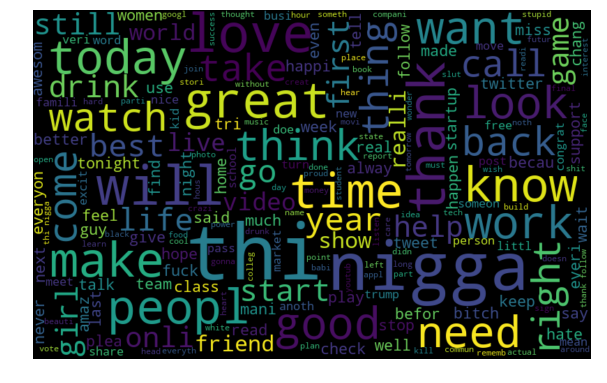

In [242]:
all_words = ' '.join([text for text in (data['clean_tweet'])])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### The first word cloud revealed cleaned_tweets without questionable content. The content of these tweets did not contain racist or sexist comments. Words like love, good , thank, and great were the most frequently used words in this classfication. 

## Word Cloud Representing Most Common Words With Regard to Tweets Not Deemed Questionable

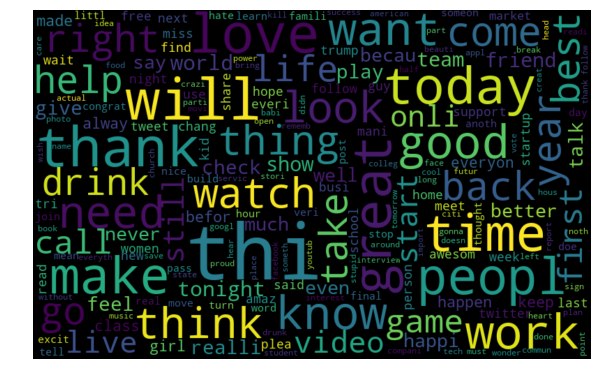

In [243]:
neutral_positive_words = ' '.join([text for text in (data['clean_tweet'][data['questionable_content'] == 0])])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neutral_positive_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Word Cloud Representing Most Common Words With Regard to Tweets  Deemed Questionable

### The second word cloud revealed cleaned_tweets again but with questionable content. The content of these tweets did contain racist or sexist comments. Words that exemplfied tweets with questionable content were the "n-word" , hate, bitch, faggot, slut, and other profanity. As we can clearly see, most of the words have negative connotations. So, it seems we have a pretty good text data to work on. Next we will the hashtags/trends in our twitter data.

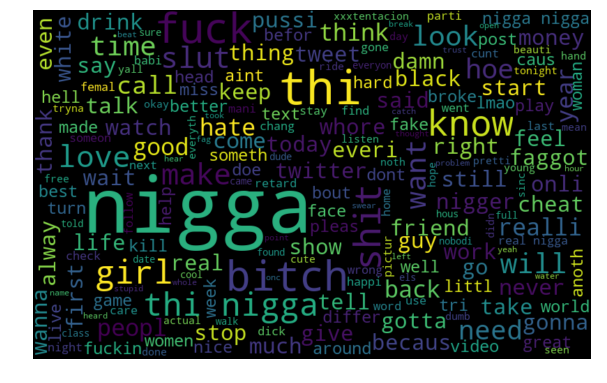

In [244]:
neagative_words = ' '.join([text for text in (data['clean_tweet'][data['questionable_content'] == 1])])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neagative_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Data Visualization & Analyzing Effects of Hashtags on Tweets 

### A huge part of twitter is not only the text that composes the body of the tweet, but also the underlying hashtag that emphasize a certain aspect of the tweet. I created the hashtag_extract function to loop over the words in the cleaned_tweets and find all instances where they contained such instance with # and return the instances. I then sepated them based on whether they were linked to questionable_content or not and created variables for each scenario. Then took the sum of hashtags to see the most frequently used ones with respect to each scenario of whether it was a tweet that containted questionable_content or not. And then Now that we have prepared our lists of hashtags for both the sentiments, we can plot the top 'n' hashtags. 

In [245]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

HT_regular = hashtag_extract(data['clean_tweet'][data['questionable_content'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(data['clean_tweet'][data['questionable_content'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

## Hashtags with Non-Questionable Tweets

### #StartUp, Periscop, & Brand were the most common hashtags used and made sense for this categaory of hashtags with non-questionable tweets. None of the below hashtags contained any negative or terms, and were either neutal or positve. 

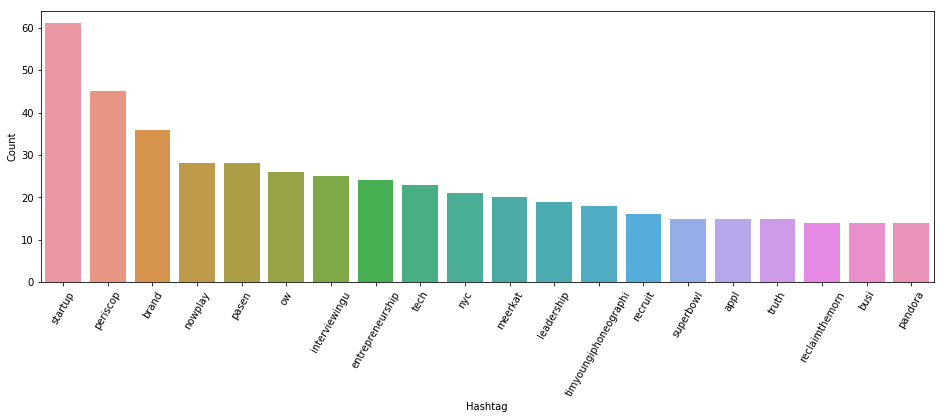

In [246]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
ax.set(ylabel = 'Count')
plt.show()

### The hastags with questionable tweets revealed #funnyracistjoke,thotboyz, and slut to be the most frequent hashtags utilized. As expected, most of the terms are negative with a few neutral terms as well. So, it’s not a bad idea to keep these hashtags in our data as they contain useful information. Next, we will try to extract features from the tokenized tweets.

## Hashtags with Questionable Tweets

[Text(0,0,'funnyracistjok'),
 Text(0,0,'thotboyz'),
 Text(0,0,'slut'),
 Text(0,0,'meerkat'),
 Text(0,0,'startup'),
 Text(0,0,'nowplay'),
 Text(0,0,'moa'),
 Text(0,0,'periscop'),
 Text(0,0,'career'),
 Text(0,0,'migrant'),
 Text(0,0,'popeinphilli'),
 Text(0,0,'sing'),
 Text(0,0,'music'),
 Text(0,0,'tomyunbornchild'),
 Text(0,0,'replaceamovietitlewithnigga'),
 Text(0,0,'twitterfing'),
 Text(0,0,'urgettingbodiedbyastrippernigga'),
 Text(0,0,'nyc'),
 Text(0,0,'nwav'),
 Text(0,0,'respect')]

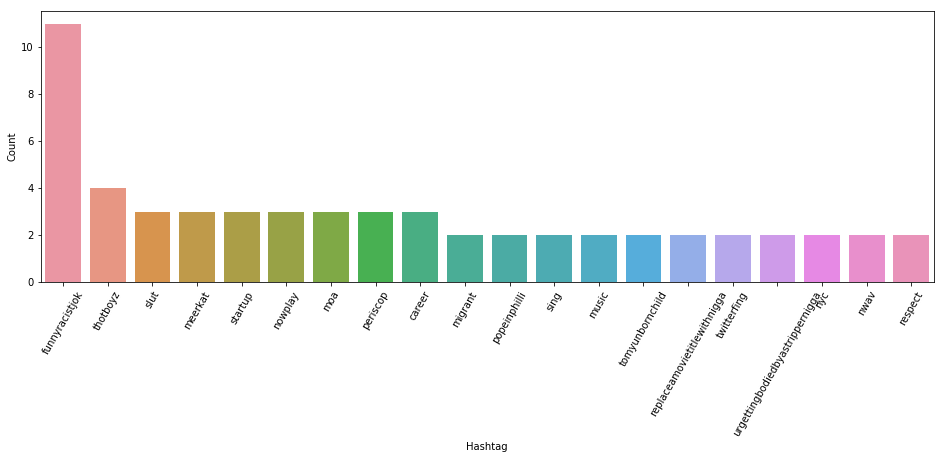

In [247]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n = 20)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)



# Feature Extraction from Cleaned Tweets

### To extract features from the Cleaned Tweets I tried using three process that would be input into a model respectively to see which feature extraction process lead to the most effective model output.

### -Bag of Words: Initialized using CountVectorizer to convert the review text into a bag-of-words. The bag of words model is used where we are only concerned with encoding schemes that represent what words are present or the degree to which they are present in encoded documents without any information about order. The purpose of this function returns An encoded vectorwith a length of the entire vocabulary and an integer count for the number of times each word appeared in the document.Then use the transform method to Extract token counts out of raw text. 

### -TfidVectorizer which stands for Term Frequency Inverse Document Frequency is another way to score the importance of words in a document based on how frequently they appear in the document. Its the ratio of number of time the word appears compared to the number of words in that document. IDF helps calculate the weight of rare words, so that a word that rarely occurs will have an high IDF score. The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents.
### ISSUE WITH BAG AND WHY TO USE TFID: One issue with simple counts is that some words like “the” will appear many times and their large counts will not be very meaningful in the encoded vectors.

### Word2Vec: I then decided to emply another form of feature extraction using Word2Vec which leverages the context of the target words. I used a skip-gram which takes the target word and the outputs are the surrounding target words. For instance, in the sentence “I have a cute dog”, the input would be “a”, whereas the output is “I”, “have”, “cute”, and “dog”. I wanted to utlize this methods because after researching it the vectors are suppose to be more “meaningful” in terms of describing the relationship between words. 

### These models are shallow, two-layer neural networks that are trained to reconstruct linguistic contexts of words. Word2vec takes as its input a large corpus of text and produces a vector space, typically of several hundred dimensions, with each unique word in the corpus being assigned a corresponding vector in the space. Word vectors are positioned in the vector space such that words that share common contexts in the corpus are located in close proximity to one another in the space.

### Gensim is specifically designed to handle large text collections

### window (int, optional) – Maximum distance between the current and predicted word within a sentence.
### min_count (int, optional) – Ignores all words with total frequency lower than this.
### negative (int, optional) – If > 0, negative sampling will be used, the int for negative specifies how many “noise words” should be drawn (usually between 5-20). If set to 0, no negative sampling is used.
### workers (int, optional) – Use these many worker threads to train the model (=faster training with multicore machines).
### seed (int, optional) – Seed for the random number generator.

### - To see how Word2Vec model performs We will specify a word and the model will pull out the most similar words from the corpus.



In [248]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

### Bag-of-Words Features 

In [249]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(data['clean_tweet'])
bow.shape

(22000, 1000)

### TF-IDF Features


In [250]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(data['clean_tweet'])
tfidf.shape

(22000, 1000)

### Word2Vec Embeddings 

In [251]:
tokenized_tweet = data['clean_tweet'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(data['clean_tweet']), epochs=20)

(2899004, 3574260)

In [252]:
model_w2v.wv.most_similar(positive="racism")

[('condemn', 0.7388562560081482),
 ('trespass', 0.7346680164337158),
 ('hatr', 0.7281016111373901),
 ('dumbass', 0.7258405685424805),
 ('saggin', 0.7255878448486328),
 ('xenophobia', 0.7238150835037231),
 ('supremacist', 0.7186676263809204),
 ('kneel', 0.7167123556137085),
 ('shouldnt', 0.7145402431488037),
 ('senjohnmccain', 0.7145401835441589)]

In [253]:
model_w2v.wv.most_similar(positive="friend")

[('siri', 0.46126195788383484),
 ('unstuck', 0.46078458428382874),
 ('misshannonh', 0.4522218108177185),
 ('ditto', 0.4516388177871704),
 ('facetim', 0.4506605565547943),
 ('furst', 0.4475679397583008),
 ('stephenathom', 0.44511353969573975),
 ('#affordableh', 0.4450032711029053),
 ('flirt', 0.4426462650299072),
 ('orgasm', 0.44166508316993713)]

In [254]:
len(model_w2v['racism']) #The length of the vector is 200

/Users/krishna366/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


200

#### Preparing Vectors for Tweets 

### I wanted to use the below function to create a vector for each tweet by taking the average of the vectors of the words present in the tweet. In doing so, Now we have 200 new features, whereas in Bag of Words and TF-IDF we had 1000 features.

### Average of Word2Vec vectors : You can just take the average of all the word vectors in a sentence. This average vector will represent your sentence vector.

In [255]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [256]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

/Users/krishna366/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(22000, 200)

# Model Building 

### Model Selection Reasons:

### Logistic Regression: Logistic regression because it is a powerful statistical way of modeling a binomial outcome (takes the value 0 or 1 like having or not having a disease) with one or more explanatory variables. In this case is the tweet questionable or not. 

### Decision Tree Classifier: Decision trees implicitly perform variable screening or feature selection. From my demonstration of tokenizing words, feature selection is highly important in analytics. When we fit a decision tree to a  dataset, the top few nodes on which the tree is split are essentially the most important variables within the dataset and feature selection is completed automatically!Decision trees are also not sensitive to outliers since the splitting happens based on proportion of samples within the split ranges and not on absolute values. Can handle both numerical and categorical data. Can also handle multi-output problems.


### Random Forest: Random Forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction. Random Forest adds additional randomness to the model, Instead of searching for the most important feature while splitting a node, it searches for the best feature among a random subset of features. This results in a wide diversity that generally results in a better model.

### decision trees might suffer from overfitting. Random Forest prevents overfitting most of the time, by creating random subsets of the features and building smaller trees using these subsets.  

### Firstly, there is the „n_estimators“ hyperparameter, which is just the number of trees the algorithm builds before taking the maximum voting or taking averages of predictions. In general, a higher number of trees increases the performance and makes the predictions more stable, but it also slows down the computation.

### XGBBoost: Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function. XGBoost unique is that it uses “a more regularized model formalization to control over-fitting, which gives it better performance,” . Gradient boosting is an approach where new models are created that predict the residuals or errors of prior models and then added together to make the final prediction.

### The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.

### maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables. It represents the depth of each tree, which is the maximum number of different features used in each tree. I recommend going from a low max_depth (3 for instance) and then increasing it incrementally by 1, and stopping when there’s no performance gain of increasing it. This will help simplify your model and avoid overfitting

### F1 Score:When you build a model for a classification problem you almost always want to look at the accuracy of that model as the number of correct predictions from all predictions made. I know also from our conversation that accuracy isnt the most important metric. So while I did include it as a metric to evaluate the model, i thought f1 score would be a better metric because it is essentially the weighted average of two other metrics (precision and recall). 


### For a Binary Label and in this case where the dataset is Unbalanced, and where both classes are important: If the data distribution is highly skewed (such as 80:20 or 90:10), then a classifier can get a low mis-classification rate simply by choosing the majority class. In such a situation, I would choose the classifier that gets high F1 scores on both classes, as well as low mis-classification rate. A classifier that gets low F1-scores should be overlooked.

### Precision is the proportion of true positive on all positives predictions. Recall is the proportion of true positives on all actual positive elements. If you want to know if your predictions are good, you need these two measures. 

### F-measure has an intuitive meaning. It tells you how precise your classifier is (how many instances it classifies correctly), as well as how robust it is (it does not miss a significant number of instances).


##### Will be using the following algorithms to build models:  1. Logistic Regression 2. Decision Tree Classifier 3. Random Forest 4. XGBoost


## Logistic Regression 

In [257]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


#### Bag-of-Words Features

In [258]:
# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(bow, data['questionable_content'],  
                                                          random_state=42, 
                                                          test_size=0.2)

In [259]:
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

0.6857749469214437

In [260]:
accuracy_score(yvalid, prediction_int) # calculating accuracy score

0.9327272727272727

In [261]:
prediction1 = lreg.predict(bow_vectorizer.transform(['Racism in this country is prevalent']))

In [262]:
if prediction1 == 1:
    print('Tweet Contains Questionable Content')
else:
    print('Tweet Does Not Contain Questionable Content')

Tweet Does Not Contain Questionable Content


#### TF-IDF Features

In [263]:
# splitting data into training and validation set
xtrain_IDF, xvalid_IDF, ytrain_IDF, yvalid_IDF = train_test_split(tfidf, data['questionable_content'],  
                                                          random_state=42, 
                                                          test_size=0.2)

In [264]:
lreg_IDF = LogisticRegression()
lreg_IDF.fit(xtrain_IDF, ytrain_IDF)

prediction = lreg.predict_proba(xvalid_IDF)
prediction_int_IDF = prediction[:,1] >= 0.3
prediction_int_IDF = prediction_int_IDF.astype(np.int)

f1_score(yvalid_IDF, prediction_int_IDF)

0.5679314565483476

In [265]:
accuracy_score(yvalid_IDF, prediction_int_IDF) # calculating accuracy score

0.9197727272727273

#### Word2Vec Features

In [266]:
# splitting data into training and validation set
xtrain_Word2Vec, xvalid_Word2Vec, ytrain1, yvalid1 = train_test_split(wordvec_df, data['questionable_content'],  
                                                          random_state=42, 
                                                          test_size=0.2)

In [267]:
lreg1 = LogisticRegression()
lreg1.fit(xtrain_Word2Vec, ytrain1) # training the model

prediction = lreg1.predict_proba(xvalid_Word2Vec) # predicting on the validation set
prediction_int1 = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int1 = prediction_int1.astype(np.int)

f1_score(yvalid1, prediction_int1) # calculating f1 score

0.6359832635983264

In [268]:
accuracy_score(yvalid1, prediction_int1) # calculating accuracy score

0.9209090909090909

## Decision Tree Classifier 

In [269]:
from sklearn.tree import DecisionTreeClassifier

#### Bag-of-Words Features

In [270]:
dtc = DecisionTreeClassifier()
dtc.fit(xtrain_bow, ytrain) # training the model

prediction_dtc = dtc.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int_dtc = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int_dtc = prediction_int_dtc.astype(np.int)

f1_score(yvalid, prediction_int_dtc) # calculating f1 score

0.6359832635983264

In [271]:
accuracy_score(yvalid, prediction_int_dtc) # calculating accuracy score

0.9209090909090909

In [272]:
prediction1 = lreg.predict(bow_vectorizer.transform(['Racism in this country is prevalent']))
if prediction1 == 1:
    print('Tweet Contains Questionable Content')
else:
    print('Tweet Does Not Contain Questionable Content')

Tweet Contains Questionable Content


#### TF-IDF Features

In [273]:
dtc_IDF = DecisionTreeClassifier()
dtc_IDF.fit(xtrain_IDF, ytrain_IDF) # training the model

prediction_dtc_IDF = dtc_IDF.predict_proba(xvalid_IDF) # predicting on the validation set
prediction_int_dtc_IDF = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int_dtc_IDF = prediction_int_dtc_IDF.astype(np.int)

f1_score(yvalid_IDF, prediction_int_IDF) # calculating f1 score

0.5679314565483476

In [274]:
accuracy_score(yvalid_IDF, prediction_int_IDF) # calculating accuracy score

0.9197727272727273

#### Word2Vec Features

In [275]:
dtc1 = DecisionTreeClassifier()
dtc1.fit(xtrain_Word2Vec, ytrain1) # training the model

prediction = dtc1.predict_proba(xvalid_Word2Vec) # predicting on the validation set
prediction_int1_dtc1 = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int1_dtc1 = prediction_int1_dtc1.astype(np.int)

f1_score(yvalid1, prediction_int1_dtc1) # calculating f1 score

0.41426146010186754

In [276]:
accuracy_score(yvalid1, prediction_int1_dtc1) # calculating accuracy score

0.8431818181818181

## Random Forest

In [277]:
from sklearn.ensemble import RandomForestClassifier

#### Bag-of-Words Features

In [278]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain)

prediction_rf = rf.predict(xvalid_bow)
f1_score(yvalid, prediction_rf)

0.68

In [279]:
accuracy_score(yvalid, prediction_rf) # calculating accuracy score

0.9309090909090909

In [280]:
prediction_rf = rf.predict(bow_vectorizer.transform(['Racism in this country is prevalent']))
if prediction_rf == 1:
    print('Tweet Contains Questionable Content')
else:
    print('Tweet Does Not Contain Questionable Content')

Tweet Contains Questionable Content


#### TF-IDF Features

In [281]:
rf_IDF = RandomForestClassifier(n_estimators=400, random_state=11)
rf_IDF.fit(xtrain_IDF, ytrain_IDF) # training the model

prediction_dtc_IDF = dtc_IDF.predict_proba(xvalid_IDF) # predicting on the validation set
prediction_int_dtc_IDF = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int_dtc_IDF = prediction_int_dtc_IDF.astype(np.int)

f1_score(yvalid_IDF, prediction_int_IDF) # calculating f1 score

0.5679314565483476

In [282]:
accuracy_score(yvalid_IDF, prediction_int_IDF) # calculating accuracy score

0.9197727272727273

#### Word2Vec Features

In [283]:
rf1 = RandomForestClassifier(n_estimators=400, random_state=11)
rf1.fit(xtrain_Word2Vec, ytrain1)

prediction_rf1 = rf1.predict(xvalid_Word2Vec)
f1_score(yvalid1, prediction_rf1)

0.5323383084577115

In [284]:
accuracy_score(yvalid1, prediction_rf1) # calculating accuracy score

0.9145454545454546

## XGBoost

In [285]:
from xgboost import XGBClassifier

### Why WORD2VEC performed poorly? - My guess is that the dataset is very small. Word2Vec won't be able to capture word relationship in the embedding space with limited information. Try to train word2vec on a very large corpus to get a very good word vector before training your classifier might help.

### Why TF-IDF performed worse? -  I would compare performance across folds to make sure countvectorizer consistently performs better. Additionally, It may be that common words (words which will appear in multiple documents) are helpful in distinguishing between classes. Function words like pronouns are very common and would be down weighted in tf-idf, but given equal weight to rare words in countvectorizer. But i feel like i eliminated this possibility by removing words shorter than 3 letters in length which corresponds to many if not all pronouns. And because of this I think CountVectorizer was improved as a result because the count wasnt affected or skewed by the prescence of these variables. 

####  Bag-of-Words Features - WINNNER

In [286]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain)
prediction_xgb = xgb_model.predict(xvalid_bow)
f1_score(yvalid, prediction_xgb)

/Users/krishna366/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.6928104575163399

In [287]:
accuracy_score(yvalid, prediction_xgb) # calculating accuracy score

0.9359090909090909

In [292]:
prediction_xgb = xgb_model.predict(bow_vectorizer.transform(['Bitch Good Family']))
if prediction_rf == 1:
    print('Tweet Contains Questionable Content')
else:
    print('Tweet Does Not Contain Questionable Content')

Tweet Contains Questionable Content


/Users/krishna366/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


#### TF-IDF Features

In [289]:
xgb_IDF = XGBClassifier(max_depth=6, n_estimators=1000)
xgb_IDF.fit(xtrain_IDF, ytrain_IDF) # training the model

prediction_dtc_IDF = dtc_IDF.predict_proba(xvalid_IDF) # predicting on the validation set
f1_score(yvalid_IDF, prediction_int_IDF) # calculating f1 score

0.5679314565483476

#### Word2Vec Features

In [290]:
xgb = XGBClassifier()
xgb.fit(xtrain_Word2Vec, ytrain1)
prediction_xgb = xgb.predict(xvalid_Word2Vec)
f1_score(yvalid1, prediction_xgb)


/Users/krishna366/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.5933806146572104

## Utilizing XBGBoost Classifier with Bag of Word Features Yielded the Highest F1Score as well as generating the Highest Accuracy and thus XGBoost was the highest performing model of the 4 models utlized. 